In [3]:
import tensorflow as tf
import librosa
import librosa.display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix,ConfusionMatrixDisplay,classification_report
import IPython.display as ipd
import os
import warnings
warnings.filterwarnings(action = 'ignore')


## Audio Selected:
* 15 words have been selected from the complete dataset.
* There are 10 speakers so each word has a count of 10 and there are 15 words so the total dataset count is 150.
* Out of these 150 data 8 speakers are used for training and 2 speakers are used for testing

|Code|word|
|---|---|
|001|Sifar|
|002|Ek|
|003|Do|
|004|Teen|
|005|Chaar|
|006|Panch|
|007|Cheh|
|008|Saat|
|009|Aath|
|010|Nau|
|011|Jummah|
|012|Haftah|
|013|Itwar|
|014|Pir|
|015|Mangal|


In [4]:
ipd.Audio('/kaggle/input/urdu-speech-dataset/files/AAMNG1/AAMNG1014.wav')

##  Dataset Formation
Filtering the 15 audios from the complete dataset

In [5]:
data = []
path = '/kaggle/input/urdu-speech-dataset/files'
file_name = ['001','002','003','004','005',
        '006','007','008','009','010',
        '011','012','013','014','015']
folder_name = ['AAMNG1','ABMNG1','ACMNG2','AEFYG1','AFFYG1',
               'AGMNG1','AHMNG1','AIMYG2','AJMNG2','AKMNG2']
final_path = []
final_class = []

for folder in folder_name:
    for file in os.listdir(os.path.join(path,folder)):
        if file[-7:-4] in file_name:
            x = file[-7:-4]
            final_path.append(os.path.join(path,folder,file))
            final_class.append(x)

In [6]:
final_data = pd.DataFrame(columns = ["path","class"])
final_data["path"] = final_path
final_data["class"] = final_class

In [7]:
final_data["class"].value_counts()

014    10
008    10
015    10
004    10
006    10
010    10
012    10
007    10
003    10
005    10
013    10
011    10
002    10
001    10
009    10
Name: class, dtype: int64

In [8]:
group = []
for i in final_data["path"]:
    a = i.split('/')
    group.append(a[-2])

In [9]:
final_data["group"] = group

In [10]:
final_data["class"] = final_data["class"].replace({"001": "Sifar", 
                                                   "002": "Ek",
                                                    "003": "Do",
                                                    "004": "Teen",
                                                    "005": "Chaar",
                                                    "006": "Paanch",
                                                    "007": "Cheh",
                                                    "008": "Saat",
                                                    "009": "Aath",
                                                    "010" : "Nau",
                                                    "011" : "Jummah",
                                                    "012" : "Haftah",
                                                    "013" : "Itwaar",
                                                    "014" : "Pir",
                                                    "015" : "Mangal"})

In [11]:
final_data

,path,class,group
0,/kaggle/input/urdu-speech-dataset/files/AAMNG1...,Pir,AAMNG1
1,/kaggle/input/urdu-speech-dataset/files/AAMNG1...,Saat,AAMNG1
2,/kaggle/input/urdu-speech-dataset/files/AAMNG1...,Mangal,AAMNG1
3,/kaggle/input/urdu-speech-dataset/files/AAMNG1...,Teen,AAMNG1
4,/kaggle/input/urdu-speech-dataset/files/AAMNG1...,Paanch,AAMNG1
...,...,...,...
145,/kaggle/input/urdu-speech-dataset/files/AKMNG2...,Mangal,AKMNG2
146,/kaggle/input/urdu-speech-dataset/files/AKMNG2...,Cheh,AKMNG2
147,/kaggle/input/urdu-speech-dataset/files/AKMNG2...,Saat,AKMNG2
148,/kaggle/input/urdu-speech-dataset/files/AKMNG2...,Jummah,AKMNG2


In [12]:
## Se;ecting training and testing groups
train_group = ['AAMNG1','ABMNG1','ACMNG2','AEFYG1','AFFYG1',
               'AGMNG1','AHMNG1','AIMYG2']
test_group = ['AJMNG2','AKMNG2']

In [13]:
final_data

,path,class,group
0,/kaggle/input/urdu-speech-dataset/files/AAMNG1...,Pir,AAMNG1
1,/kaggle/input/urdu-speech-dataset/files/AAMNG1...,Saat,AAMNG1
2,/kaggle/input/urdu-speech-dataset/files/AAMNG1...,Mangal,AAMNG1
3,/kaggle/input/urdu-speech-dataset/files/AAMNG1...,Teen,AAMNG1
4,/kaggle/input/urdu-speech-dataset/files/AAMNG1...,Paanch,AAMNG1
...,...,...,...
145,/kaggle/input/urdu-speech-dataset/files/AKMNG2...,Mangal,AKMNG2
146,/kaggle/input/urdu-speech-dataset/files/AKMNG2...,Cheh,AKMNG2
147,/kaggle/input/urdu-speech-dataset/files/AKMNG2...,Saat,AKMNG2
148,/kaggle/input/urdu-speech-dataset/files/AKMNG2...,Jummah,AKMNG2


In [14]:
## sorting the values
final_data = final_data.sort_values(by = "class")

In [15]:
final_data

,path,class,group
84,/kaggle/input/urdu-speech-dataset/files/AGMNG1...,Aath,AGMNG1
138,/kaggle/input/urdu-speech-dataset/files/AKMNG2...,Aath,AKMNG2
15,/kaggle/input/urdu-speech-dataset/files/ABMNG1...,Aath,ABMNG1
14,/kaggle/input/urdu-speech-dataset/files/AAMNG1...,Aath,AAMNG1
119,/kaggle/input/urdu-speech-dataset/files/AIMYG2...,Aath,AIMYG2
...,...,...,...
143,/kaggle/input/urdu-speech-dataset/files/AKMNG2...,Teen,AKMNG2
3,/kaggle/input/urdu-speech-dataset/files/AAMNG1...,Teen,AAMNG1
101,/kaggle/input/urdu-speech-dataset/files/AHMNG1...,Teen,AHMNG1
106,/kaggle/input/urdu-speech-dataset/files/AIMYG2...,Teen,AIMYG2


In [16]:
Train = final_data[(final_data["group"] != 'AAMNG1') &
                  (final_data["group"] != 'ABMNG1')]
Test = final_data[(final_data["group"] == 'AAMNG1') |
                  (final_data["group"] == 'ABMNG1')]

In [17]:
Train["group"].value_counts()

AGMNG1    15
AKMNG2    15
AIMYG2    15
AFFYG1    15
AEFYG1    15
AJMNG2    15
ACMNG2    15
AHMNG1    15
Name: group, dtype: int64

In [18]:
Test["group"].value_counts()

ABMNG1    15
AAMNG1    15
Name: group, dtype: int64

In [19]:
def waveform(file):
    x , sr = librosa.load(file)
    plt.figure(figsize=(20, 5))
    plt.title('Waveplot of audio {}'.format(file))
    librosa.display.waveshow(x, sr=sr)
    plt.show()
    
def Zero_crossing_rate(file):
    x, sr = librosa.load(file)
    
    zero_crossings = librosa.zero_crossings(x)
    print("Sum of zero crossing ", zero_crossings.sum())
    plt.figure(figsize=(20, 5))
    plt.title('Zero Crossing Rate of audio {}'.format(file))
    zcrs = librosa.feature.zero_crossing_rate(x)
    plt.plot(zcrs[0])
    plt.show()
    
def mfcc(file):
    x,  sr = librosa.load(file)
    plt.figure(figsize=(20, 6))
    plt.title('MFCC Spectral of audio {}'.format(file))
    mfccs = librosa.feature.mfcc(y=x, sr=sr)
    librosa.display.specshow(mfccs, sr=sr, x_axis='time')
    plt.show()

## Plotting Waveform MFCC, Zero Crossing Rate

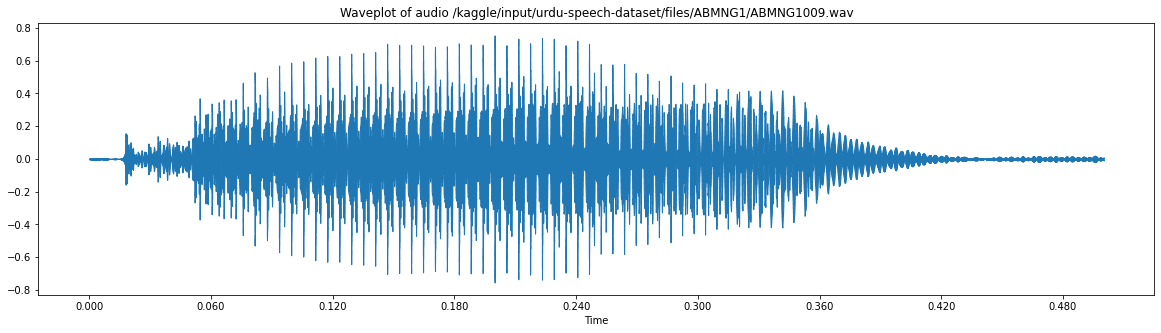

Sum of zero crossing  500


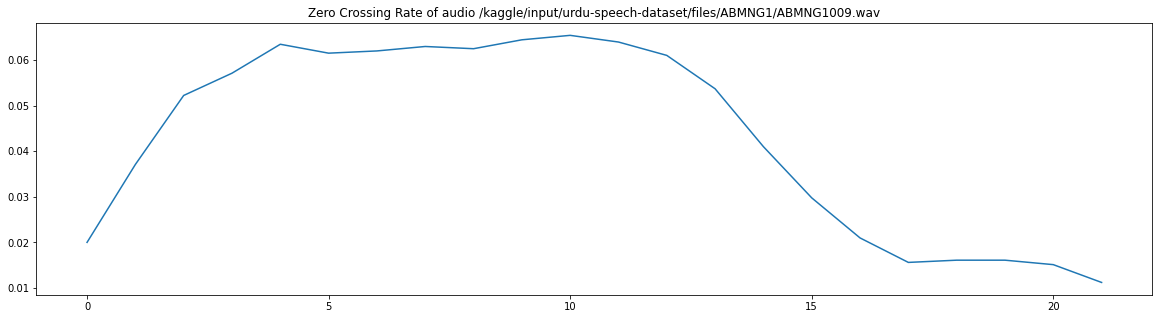

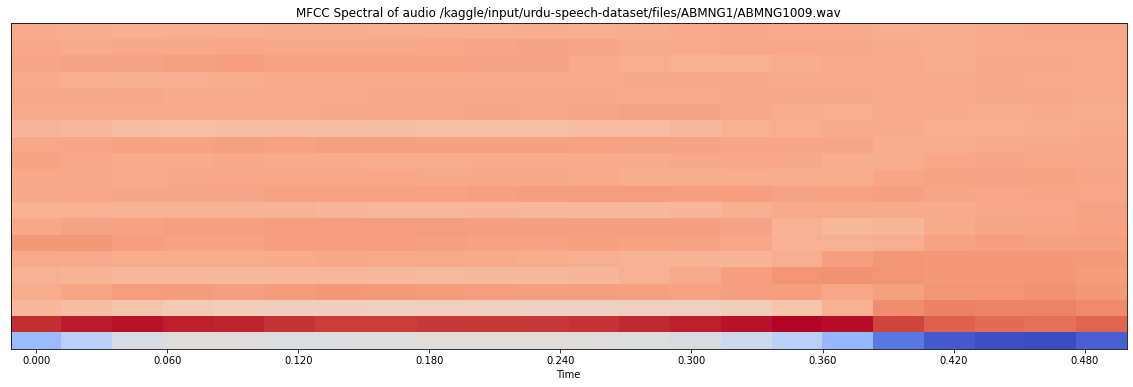

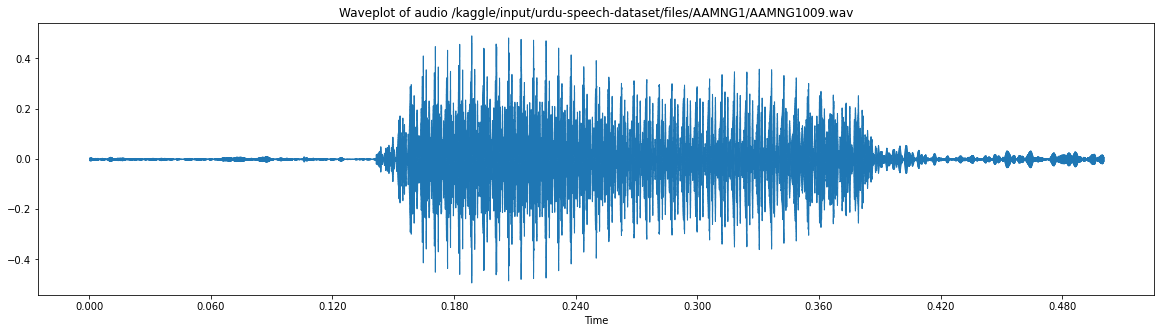

Sum of zero crossing  587


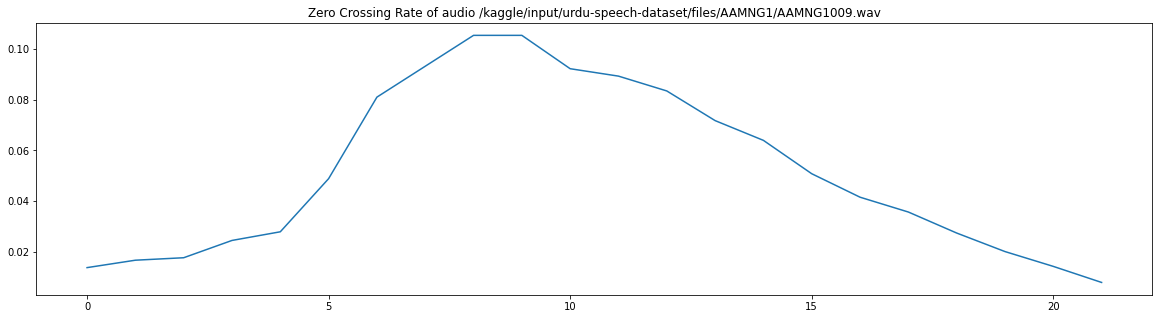

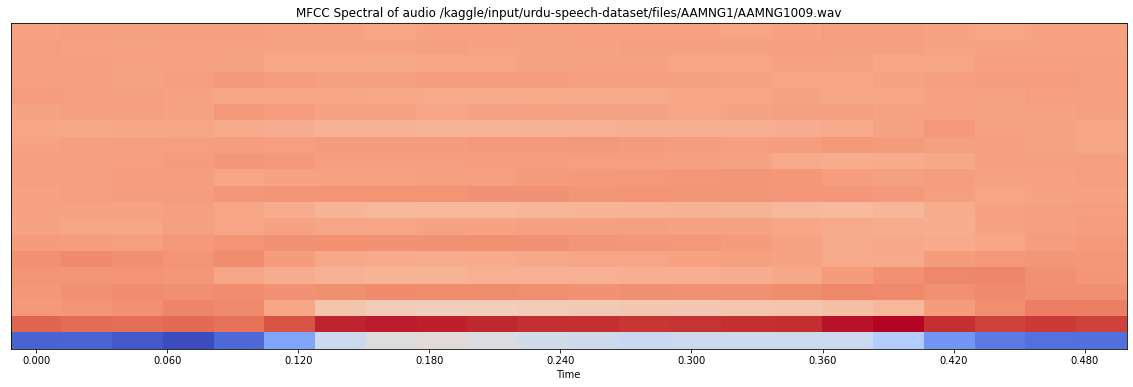

In [20]:
j = 1
for i in Test["path"]:
    if j !=3:
        waveform(i)
        Zero_crossing_rate(i)
        mfcc(i)
        j= j+1

## Creating MFCC features for training and testing

In [21]:
def mfcc_features_extract(x):
    features_mfcc = []
    try:
        x , sr = librosa.load(x,sr = 16000)
        features_mfcc = librosa.feature.mfcc(y=x, sr=sr, n_mfcc=64)
        features_mfcc = np.mean(features_mfcc.T,axis=0)
    except:
        print('Error reading audio')
    return features_mfcc

In [22]:
%%time
X_train = pd.DataFrame(Train['path'].apply(lambda x: mfcc_features_extract(x)).tolist())
X_train.head()


CPU times: user 3.07 s, sys: 3.5 s, total: 6.57 s
Wall time: 1.9 s


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-215.130341,155.807251,-17.788044,10.978125,5.905760,-1.958499,12.997573,-19.789848,6.204048,11.939322,...,0.380097,2.188092,2.352236,4.736832,1.114175,1.542971,-0.163306,4.665348,2.138585,1.148198
1,-238.550598,195.626190,-35.966423,-9.927373,-2.315624,7.660262,10.487662,-15.206774,-2.516832,-1.709202,...,9.483280,1.297083,-1.192372,3.282035,4.329343,4.263572,-2.222240,-5.488788,0.033573,-0.377828
2,-225.425308,179.011536,0.517562,15.263362,-3.125687,14.845773,-6.158177,-16.650082,-13.083208,20.106236,...,-1.786450,5.344679,5.395946,0.541173,-3.447963,-1.701260,2.763360,2.750924,-3.336806,-5.750641
3,-242.584167,128.959137,-34.915688,9.722728,7.384696,-2.522180,4.929399,6.341201,-9.748105,-7.823823,...,-2.933259,1.093308,0.351833,-2.630649,-1.716320,-1.508973,-4.777374,2.254121,1.115704,-5.128045
4,-232.762878,116.130737,-17.795256,4.440650,-19.299252,8.603413,-8.087374,-1.089233,4.825675,5.916730,...,0.307334,0.989395,1.048013,-1.193717,-1.302698,-1.190852,-1.281696,2.437877,-1.820997,-3.153321


In [23]:
%%time
X_test = pd.DataFrame(Test['path'].apply(lambda x: mfcc_features_extract(x)).tolist())
X_test.head()

CPU times: user 773 ms, sys: 893 ms, total: 1.67 s
Wall time: 479 ms


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-213.082870,128.774414,-47.211296,14.315412,-13.129703,4.060985,12.514373,-18.027668,4.165505,0.328057,...,-5.370307,-1.284371,2.601379,-1.438059,-5.371963,-2.086936,-0.942609,-3.111586,-3.497427,-2.891073
1,-292.626282,121.421234,-21.968727,30.823841,-4.344010,10.942352,10.868591,-33.069267,13.032501,7.913985,...,-0.163876,-5.202040,-1.673284,4.363016,2.046428,-3.702781,-3.702853,-0.050357,1.322076,-3.716594
2,-272.323273,91.485168,3.981355,34.426605,-0.127654,0.358230,-3.140613,-21.348886,17.626158,6.805389,...,1.915809,4.398821,-4.479050,-0.753768,1.525928,6.361166,0.132031,-8.123093,-3.807308,1.982341
3,-130.032928,94.016479,-35.678444,18.468018,-13.874060,-8.638550,2.440390,-19.878124,15.796018,-10.637024,...,-2.710419,-1.773479,-0.970922,-3.880383,-6.781918,-2.346168,-4.632516,-4.907690,-4.926371,-6.052936
4,-219.336578,50.994789,14.952021,90.103203,-21.830963,-16.392427,0.262364,-21.819706,-6.028604,-22.081913,...,-0.734132,-1.091197,-4.882667,-6.417882,-1.376999,-0.027478,-7.564950,-8.595961,-4.952239,-2.450226


In [24]:
encoder = LabelEncoder()
encoder.fit(Train['class'])
y_train = encoder.transform(Train['class'])
y_test = encoder.transform(Test['class'])

In [25]:
X_train["class"] = y_train
X_test["class"] = y_test

In [26]:
Train = X_train.sample(frac=1)
Test = X_test.sample(frac=1)
y_train  = Train.iloc[:,-1:] 
y_test = Test.iloc[:,-1:]
X_train = Train.iloc[:,:-1]
X_test = Test.iloc[:,:-1]

## Model building

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


## Logistic Regression

In [30]:
grid={
      "C":np.logspace(-3,3,20)
     } 
LR=LogisticRegression()
grid_LR=GridSearchCV(LR,grid,cv=5)
grid_LR.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",grid_LR.best_params_)
print("accuracy :",grid_LR.best_score_*100)

tuned hpyerparameters :(best parameters)  {'C': 1.438449888287663}
accuracy : 30.833333333333336


In [31]:
def build_model(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    print("-----------------Training-------------------")
    print("Train Accuracy = ",accuracy_score(y_train,y_pred_train))
    plt.show(ConfusionMatrixDisplay.from_predictions(y_train,y_pred_train))
    
    ## Testing
    print("-----------------Testing-------------------")
    print("Testing Accuracy = ",accuracy_score(y_test,y_pred_test))
    print("Classification report :",classification_report(y_test,y_pred_test))
    plt.show(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_test))

-----------------Training-------------------
Train Accuracy =  1.0


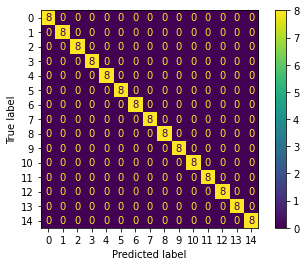

-----------------Testing-------------------
Testing Accuracy =  0.4
Classification report :               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      0.50      0.50         2
           2       0.20      0.50      0.29         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       0.33      0.50      0.40         2
           6       0.50      0.50      0.50         2
           7       0.67      1.00      0.80         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       1.00      0.50      0.67         2
          12       0.50      0.50      0.50         2
          13       0.25      1.00      0.40         2
          14       1.00      0.50      0.67         2

    accuracy                           0.4

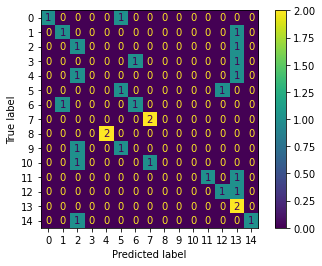

In [32]:
model = LogisticRegression(C =1.438449888287663)
build_model(model,X_train,y_train,X_test,y_test)

In [33]:
import joblib
joblib.dump(model,"Logistic_Regression")

['Logistic_Regression']

## LDA

In [34]:
param_grid = {'solver':['svd','lsqr','eigen'],
             'shrinkage': ['none','auto'],
             }
lda = LDA(n_components=1)
grid_lda=GridSearchCV(lda,param_grid,cv=5)
grid_lda.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",grid_lda.best_params_)
print("accuracy :",grid_lda.best_score_*100)

tuned hpyerparameters :(best parameters)  {'shrinkage': 'auto', 'solver': 'lsqr'}
accuracy : 29.166666666666664


-----------------Training-------------------
Train Accuracy =  0.9583333333333334


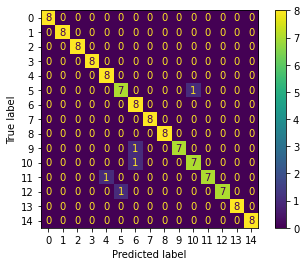

-----------------Testing-------------------
Testing Accuracy =  0.16666666666666666
Classification report :               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         2
           2       1.00      0.50      0.67         2
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         2
           5       1.00      0.50      0.67         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.10      1.00      0.17         2
          14       0.50      0.50      0.50         2

    accuracy              

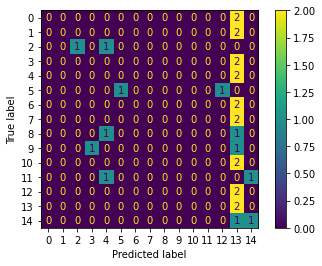

In [35]:
model = LDA(shrinkage =  'auto', solver= 'lsqr')
build_model(model,X_train,y_train,X_test,y_test)

In [36]:
joblib.dump(model,"LDA")

['LDA']

## SVC

In [37]:
from sklearn.svm import SVC
param_grid = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma' : ['scale', 'auto'],
}
svc = SVC()
grid_svc=GridSearchCV(svc,param_grid,cv=5)
grid_svc.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",grid_svc.best_params_)
print("accuracy :",grid_svc.best_score_*100)

tuned hpyerparameters :(best parameters)  {'gamma': 'scale', 'kernel': 'linear'}
accuracy : 34.166666666666664


-----------------Training-------------------
Train Accuracy =  1.0


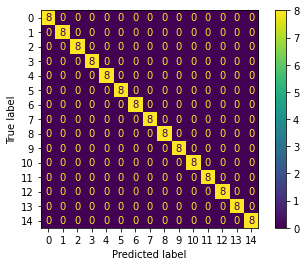

-----------------Testing-------------------
Testing Accuracy =  0.6
Classification report :               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2
           2       0.50      0.50      0.50         2
           3       0.67      1.00      0.80         2
           4       0.20      0.50      0.29         2
           5       0.50      0.50      0.50         2
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         2
           8       0.00      0.00      0.00         2
           9       1.00      0.50      0.67         2
          10       0.00      0.00      0.00         2
          11       0.67      1.00      0.80         2
          12       0.50      0.50      0.50         2
          13       0.67      1.00      0.80         2
          14       1.00      1.00      1.00         2

    accuracy                           0.6

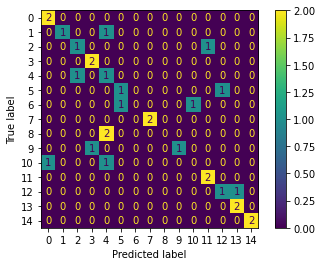

In [38]:
model = SVC(gamma = 'scale', kernel = 'linear')
build_model(model, X_train, y_train, X_test, y_test)

In [39]:
joblib.dump(model,'SVC')

['SVC']

## Random forest

In [40]:
param_grid = { 
    'n_estimators': [100, 150, 300, 500,800 , 1200],
    'max_features': ['sqrt', 'log2',None],
    'max_depth' : [5,10,15,20,30,50,None],
    'min_samples_split' : [2,5,10,15,20,30,100],
    'min_samples_leaf' : [2,5,10]
}
rfc=RandomForestClassifier(random_state=42)
grid_rfc = RandomizedSearchCV(rfc,param_grid,cv = 5)
grid_rfc.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) ",grid_rfc.best_params_)
print("accuracy :",grid_rfc.best_score_*100)

tuned hpyerparameters :(best parameters)  {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 5, 'max_features': None, 'max_depth': 15}
accuracy : 24.16666666666667


-----------------Training-------------------
Train Accuracy =  0.9666666666666667


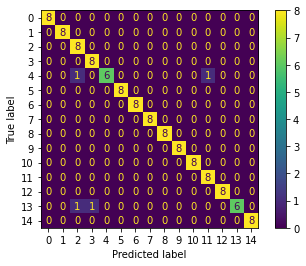

-----------------Testing-------------------
Testing Accuracy =  0.4
Classification report :               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      0.50      0.67         2
           2       0.00      0.00      0.00         2
           3       0.67      1.00      0.80         2
           4       0.25      0.50      0.33         2
           5       0.50      0.50      0.50         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.25      0.50      0.33         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       0.50      0.50      0.50         2

    accuracy                           0.4

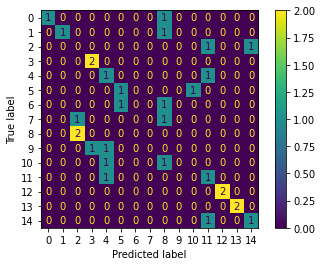

In [41]:
model = RandomForestClassifier(n_estimators =  100, min_samples_split =  10, 
                               min_samples_leaf = 5, max_features = None, 
                               max_depth =  15)
build_model(model, X_train, y_train, X_test, y_test)

In [42]:
joblib.dump(model, 'RFC')

['RFC']

**SVC gives the best model performace however there is high overfitting**

In [43]:
model_SVC = joblib.load("./SVC")

## Testing on own audio file

In [44]:
def create_feature(start,end):
    features_mfcc = librosa.feature.mfcc(y=x[int(start*per_window):int(end*per_window)], sr=sr, n_mfcc=64)
    features_mfcc = np.mean(features_mfcc.T,axis=0)
    return features_mfcc
def predict(features_mfcc,actual,model_SVC):
    pred = model_SVC.predict(features_mfcc.reshape(1,-1))
    #print(pred)
    print("Actual : {} , Predicted = {}".format(actual, encoder.inverse_transform(pred)))

In [45]:
ipd.Audio('../input/my-data/Standard recording 10.wav')

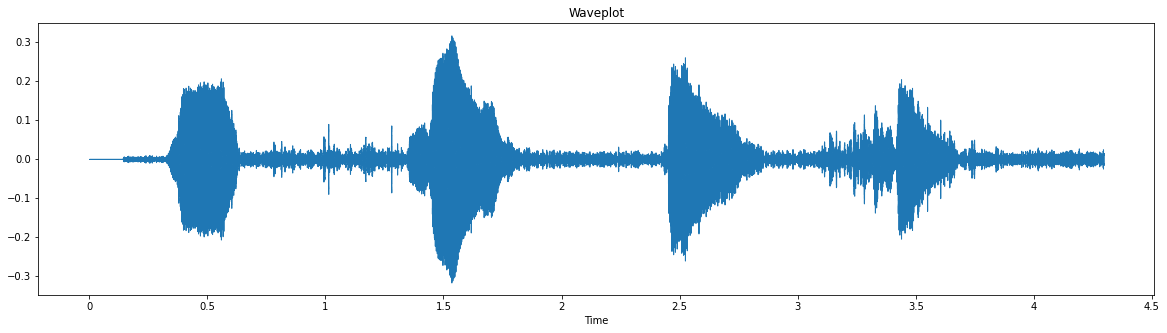

In [46]:
x , sr = librosa.load('../input/my-data/Standard recording 10.wav',sr = 16000)
plt.figure(figsize=(20, 5))
plt.title('Waveplot')
librosa.display.waveshow(x, sr=sr)
plt.show()

audio file has the words Ek, Do, Teen, Chaar

In [47]:
total_time = x.shape[0]/sr
per_window = x.shape[0]/total_time
total_time, per_window

(4.296, 15999.999999999998)

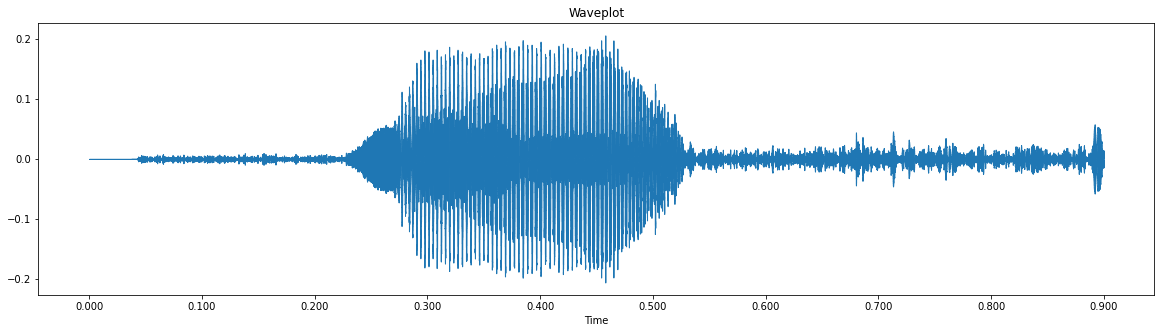

In [48]:
x , sr = librosa.load('../input/my-data/Standard recording 10.wav',sr = 16000)
plt.figure(figsize=(20, 5))
plt.title('Waveplot')
librosa.display.waveshow(x[int(0.1*per_window):int(1*per_window)], sr=sr)
plt.show()

In [49]:
features_mfcc = create_feature(0.1,1)
predict(features_mfcc,"Ek",model_SVC)

Actual : Ek , Predicted = ['Nau']


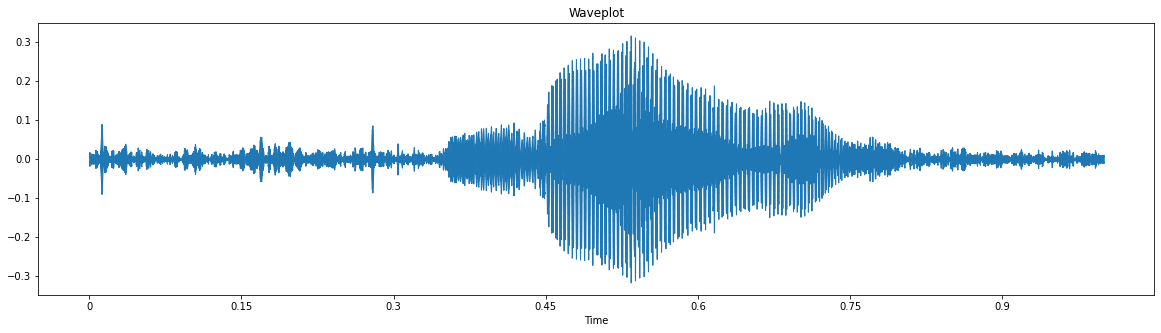

In [50]:
plt.figure(figsize=(20, 5))
plt.title('Waveplot')
librosa.display.waveshow(x[int(1*per_window):int(2*per_window)], sr=sr)
plt.show()

In [51]:
features_mfcc = create_feature(1,2)
predict(features_mfcc,"Do",model_SVC)

Actual : Do , Predicted = ['Nau']


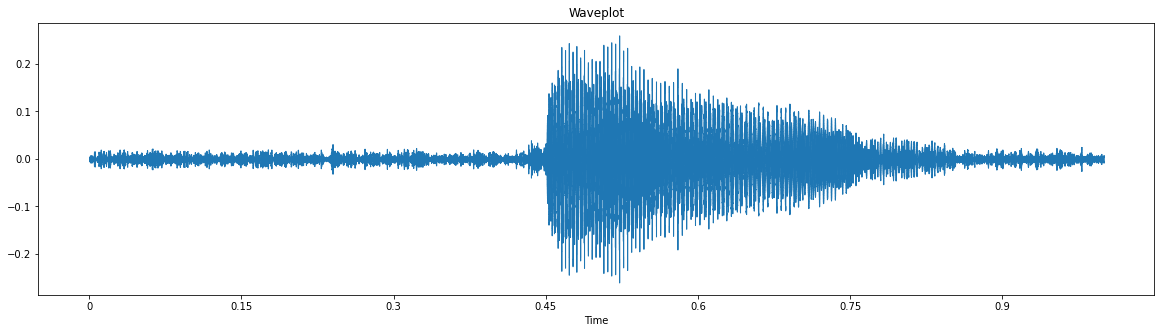

In [52]:
plt.figure(figsize=(20, 5))
plt.title('Waveplot')
librosa.display.waveshow(x[int(2*per_window):int(3*per_window)], sr=sr)
plt.show()

In [53]:
features_mfcc = create_feature(2,3)
predict(features_mfcc,"Teen",model_SVC)

Actual : Teen , Predicted = ['Aath']


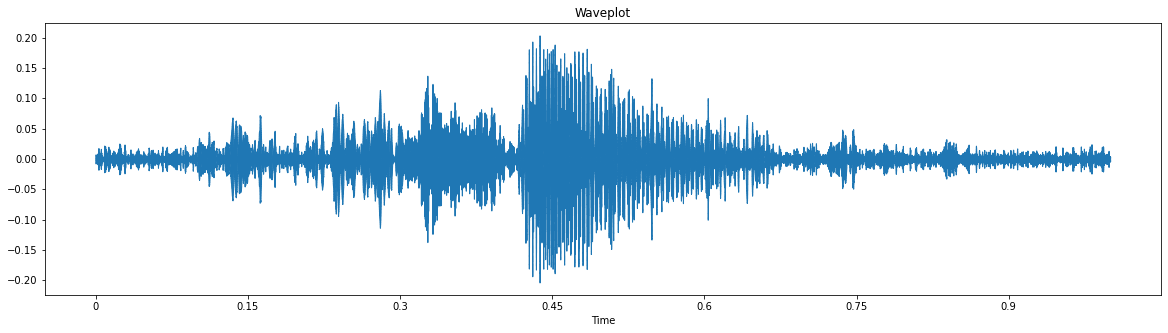

In [54]:
plt.figure(figsize=(20, 5))
plt.title('Waveplot')
librosa.display.waveshow(x[int(3*per_window):int(4*per_window)], sr=sr)
plt.show()

In [85]:
features_mfcc = create_feature(3,4)
predict(features_mfcc,"Chaar",model_SVC)

Actual : Chaar , Predicted = ['Aath']


The model is not predicting the words correctly :
* The reasons are that there is high overfitting in the data, the model is trained on very less data the model perfomance would increase if the data size is more.